In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr
img = cv2.imread('/content/india_Motorcycle_20130322_0001.webp')
print(img)

[[[112 165 238]
  [129 177 251]
  [133 170 243]
  ...
  [ 61  81  82]
  [ 52  74  75]
  [ 51  70  73]]

 [[ 96 148 222]
  [117 166 238]
  [127 165 236]
  ...
  [ 59  79  80]
  [ 43  65  66]
  [ 51  71  72]]

 [[103 156 227]
  [118 168 237]
  [119 157 226]
  ...
  [ 55  75  77]
  [ 37  62  63]
  [ 44  66  67]]

 ...

 [[ 88  77  68]
  [ 91  81  71]
  [ 90  80  70]
  ...
  [121 107  94]
  [120 106  92]
  [125 113 101]]

 [[ 87  76  67]
  [ 89  79  69]
  [ 88  77  68]
  ...
  [115 102  88]
  [116 103  89]
  [125 113 101]]

 [[ 83  73  63]
  [ 87  76  67]
  [ 85  75  65]
  ...
  [116 103  89]
  [120 106  92]
  [125 113 101]]]


In [ ]:
cascade = cv2.CascadeClassifier('/content/haarcascade_russian_plate_number.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plates = cascade.detectMultiScale(gray, 1.1, 4)
for (x,y,w,h) in plates:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    plate = img[y:y+h, x:x+w]
    cv2.imwrite('number_plate.jpg', plate)

# Display the image
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
number_plate=cv2.imread('/content/number_plate.jpg')

In [ ]:
gray = cv2.cvtColor(number_plate,cv2.COLOR_BGR2GRAY)

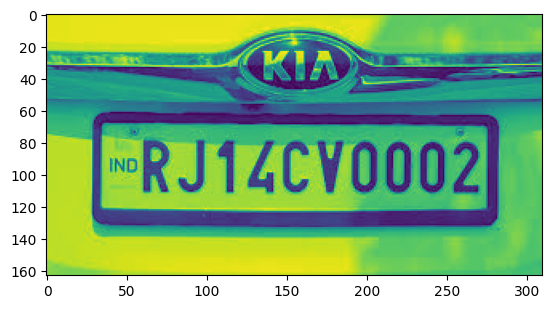

In [ ]:
plt.imshow(gray)

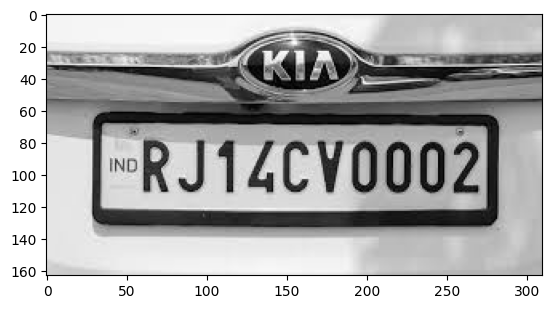

In [ ]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [ ]:
edged = cv2.Canny(bfilter, 30, 200)

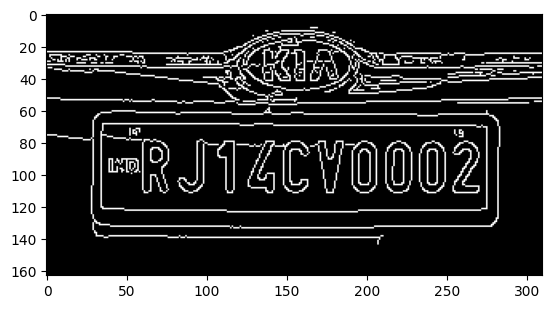

In [ ]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
print(contours)

[array([[[139,  58]],

       [[135,  62]],

       [[116,  62]],

       [[115,  61]],

       [[ 84,  61]],

       [[ 83,  62]],

       [[ 81,  62]],

       [[ 80,  61]],

       [[ 56,  61]],

       [[ 55,  60]],

       [[ 41,  60]],

       [[ 40,  61]],

       [[ 34,  61]],

       [[ 33,  62]],

       [[ 32,  62]],

       [[ 30,  64]],

       [[ 30,  65]],

       [[ 29,  66]],

       [[ 29,  76]],

       [[ 27,  78]],

       [[ 23,  78]],

       [[ 22,  77]],

       [[ 14,  77]],

       [[ 13,  76]],

       [[  7,  76]],

       [[  6,  75]],

       [[  0,  75]],

       [[  6,  75]],

       [[  7,  76]],

       [[ 13,  76]],

       [[ 14,  77]],

       [[ 22,  77]],

       [[ 23,  78]],

       [[ 27,  78]],

       [[ 28,  77]],

       [[ 29,  78]],

       [[ 29, 106]],

       [[ 28, 107]],

       [[ 28, 124]],

       [[ 29, 125]],

       [[ 29, 127]],

       [[ 30, 128]],

       [[ 30, 129]],

       [[ 29, 130]],

       [[ 29, 134]],

       [[

In [ ]:
location = None

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
print(location)

[[[ 29  66]]

 [[276  62]]

 [[282 126]]

 [[ 34 131]]]


In [ ]:
mask = np.zeros(gray.shape, np.uint8)

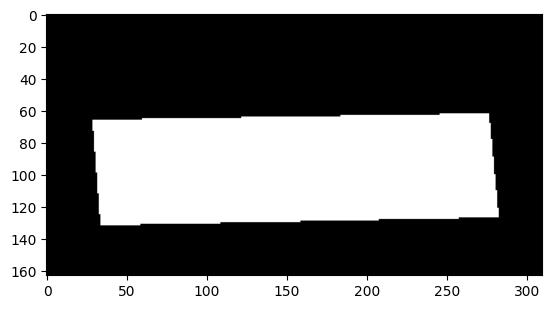

In [ ]:
new_image = cv2.drawContours(mask, [location], 0, 255, -1)

#new_image = cv2.bitwise_and(img, img, mask = mask)


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x, y) = np.where(mask == 255)

(x1, y1) = (np.min(x), np.min(y))

(x2, y2) = (np.max(x), np.max(y))

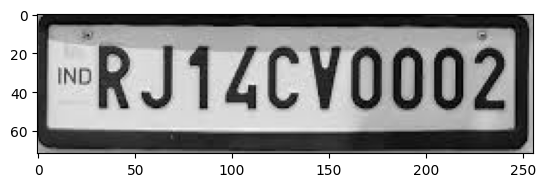

In [ ]:
cropped_image = gray[x1:x2+3, y1:y2+3]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])

result = reader.readtext(gray)

print(result)

[([[37, 87], [61, 87], [61, 101], [37, 101]], 'IND', 0.9996231209936868), ([[54, 72], [278, 72], [278, 120], [54, 120]], 'RJiLcV0002]', 0.09329604028985262)]


In [ ]:
print(result[0][0])

[[37, 87], [61, 87], [61, 101], [37, 101]]


In [ ]:
print(result[0][1])

IND


In [ ]:
text = result[0][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
import torch
import pandas as pd
from pathlib import Path

def inference_and_save_csv(weights_path, image_path, output_csv_path):
    # Load YOLOv5 model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)

    # Run inference
    results = model(image_path)

    # Get detection results as a Pandas DataFrame
    detections = results.pandas().xyxy[0]  # Bounding boxes and detection info

    # Debug: Print detection results
    print(detections)

    # Save detections to a CSV file
    output_csv_path = Path(output_csv_path)
    output_csv_path.parent.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
    detections.to_csv(output_csv_path, index=False)

    print(f"Detections saved to CSV: {output_csv_path}")

# Example usage
weights_path = '/content/best (1).pt'
image_path = '/content/motorcycle-tours-india.jpg'
output_csv_path = '/content/detections.csv'

inference_and_save_csv(weights_path, image_path, output_csv_path)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-17 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


           xmin        ymin         xmax        ymax  confidence  class  \
0    436.295044  151.448792   496.378906  235.633163    0.918556      2   
1   1269.961670  155.736053  1342.355835  242.344818    0.910581      3   
2    250.153763  164.599777   322.446259  239.398712    0.866622      2   
3    518.518005  165.914246   568.833191  234.831451    0.863090      3   
4    872.267761   97.320938   930.802002  183.795700    0.844877      2   
5    691.340332  152.246216   748.555908  231.308090    0.837870      3   
6    138.136185  158.619385   366.852234  547.067322    0.817046      1   
7    812.666443   74.220993  1133.198486  648.310364    0.753086      1   
8    691.860718  153.991440   747.697998  231.204376    0.740275      2   
9    595.574768  129.174911   820.107971  634.459961    0.738980      1   
10   351.820740  142.741226   529.716736  554.796326    0.650706      1   
11  1117.339722  116.790459  1462.473389  681.000000    0.635499      1   
12   423.213776  134.1927

In [ ]:
!pip install pytesseract opencv-python pandas ultralytics
!apt-get install -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,992 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import torch
import pandas as pd
import cv2
import pytesseract  # Ensure Tesseract OCR is installed
from pathlib import Path

# Configure Tesseract OCR path if necessary (Uncomment and update for local setup)
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def inference_with_ocr_and_save_csv(weights_path, image_path, output_csv_path):
    # Load YOLOv5 model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)

    # Run inference
    results = model(image_path)

    # Get detection results as a Pandas DataFrame
    detections = results.pandas().xyxy[0]

    # Load the image for OCR
    image = cv2.imread(image_path)
    detected_data = []

    # Filter for relevant detections
    for _, row in detections.iterrows():
        class_name = row['name']
        if class_name in ['Without Helmet', 'Bike Without Helmet']:  # Relevant classes
            x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            cropped_image = image[y1:y2, x1:x2]  # Crop the detection area

            # Run OCR on the cropped image
            license_plate_text = pytesseract.image_to_string(cropped_image, config='--psm 8').strip()

            # Save detection data
            detected_data.append({
                'class': class_name,
                'confidence': row['confidence'],
                'license_plate': license_plate_text,
                'bounding_box': f"[{x1}, {y1}, {x2}, {y2}]"
            })

    # Convert the data to a DataFrame
    detected_df = pd.DataFrame(detected_data)

    # Save the data to a CSV file
    output_csv_path = Path(output_csv_path)
    output_csv_path.parent.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
    detected_df.to_csv(output_csv_path, index=False)

    print(f"Filtered detections with license plates saved to CSV: {output_csv_path}")

# Example usage
weights_path = '/content/best (1).pt'
image_path = '/content/motorcycle-tours-india.jpg'
output_csv_path = '/content/detections.csv'

inference_with_ocr_and_save_csv(weights_path, image_path, output_csv_path)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-11-17 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Filtered detections with license plates saved to CSV: /content/detections.csv
